In [2]:
import pandas as pd
import random
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import scipy.stats as stats
import statsmodels.api as sm
pd.set_option("display.notebook_repr_html", False)
pd.set_option("display.max_columns", 100)
pd.set_option("display.width", 110)
pd.set_option("precision", 4)
pd.set_option("max_rows", 100)
pd.set_option("min_rows", 90)

%matplotlib inline

In [3]:
df_market_Portfolio = pd.read_csv("Market_Portfolio.csv")

In [4]:
"""Assignment 1 : Mean Variance -Analysis"""
"A. Data Load"
data  = pd.read_csv("Industry_Portfolios.csv")
"B.Data Changes"
data.isnull().sum()
data["Date"] = pd.to_datetime(data['Date'],format='%Y%m')
df  = data.copy()
df.set_index( "Date", inplace =True)

In [5]:
"C. Matrix creation "

"1. Covaraince Matrix"
df_cov = df.cov()
df_cov_array = np.array(df_cov)
Covmatrix_inverse = np.array(np.linalg.inv(np.array(df_cov)))
Covmatrix_array = np.array(df_cov)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array) 

In [6]:
"2. Std.Deviation , Mean, e"
R = pd.DataFrame(df.mean())
R_array = np.array(R)
R_array_Tran = np.array(R).T
Covmatrix = df.cov()
Covmatrix_array = np.array(Covmatrix)
Covmatrix_inverse = np.linalg.inv(Covmatrix_array)

e = pd.DataFrame([1] * len( df.columns))
e  = np.array(e)

In [7]:
## Economic Frontier without riskless asset
"Given Data:"
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,2,0.01))
risk_free_rate = 0.13

"Alpha Zeta and delta"
alpha = (R_array.T).dot(Covmatrix_inverse).dot(np.array(e))

zeta = R_array_Tran.dot(Covmatrix_inverse).dot(R_array)
e_Tran = np.array(e).T
Delta = e_Tran.dot(Covmatrix_inverse).dot(np.array(e))

"Global Minimum Variance Portfolio expected return"
RMV = alpha / Delta

In [8]:
"Weight Calculation using Lagrange Multiplie and a/b " 
#Expected_Return = 0.02
#Weight_a_b = Optimal_Portfolio_weight_a_b(zeta,Covmatrix_inverse,e,alpha,R_array,Delta,Expected_Return)
#Weight_Lagrange_Multipliers = Weight_Lagrange_Multipliers(Expected_Return)
#Weight_Lagrange_Multipliers
df_exp_front  = pd.DataFrame( np.arange(0,2,0.01))
"Efficient Frontier with Variance witout RMV"

df_exp_front.rename ( columns = {0 :"Exp_Return"}, inplace = True)
df_exp_front["Exp_Return_Variance"] = pd.DataFrame(df_exp_front.Exp_Return.apply( lambda x : float((Weight_Lagrange_Multipliers(x).T).dot(Covmatrix_array).dot(Weight_Lagrange_Multipliers(x)).astype(float)) ))

"Minimum Variance Frontier  - RMV "
df_exp_front["Exp_Return_var_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))* np.square(x  - (alpha/Delta))))).astype(float)))
#plt.plot(df_exp_front["Exp_Return_var_dev_Rmv"],df_exp_front["Exp_Return"])

"Minimum Variance Frontier with Std Deviation - RMV "
df_exp_front["Exp_Return_Std_dev_Rmv"] = df_exp_front["Exp_Return"].apply(lambda x : float(np.sqrt((1/Delta) + (( Delta /(zeta*Delta -np.square(alpha))* np.square(x  - (alpha/Delta))))).astype(float)))
#plt.plot(df_exp_front["Exp_Return_Std_dev_Rmv"],df_exp_front["Exp_Return"],label="Without Riskless Asset", color ="blue")

## Economic Frontier WITH riskless asset
"Given Data:"
Expected__Mean_Vertical_axis  = pd.DataFrame( np.arange(0,2,0.01))
risk_free_rate = 0.13
Risk_Free__Rate = 0.13
rmv = alpha / Delta
df_exp_front["Exp_Return_var_rmv_withRiskFree"] = df_exp_front["Exp_Return"].apply(lambda x : float( np.square(x - risk_free_rate) / ( zeta - 2 * alpha *risk_free_rate + Delta * np.square(risk_free_rate)  ) ))
df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"] = df_exp_front["Exp_Return"].apply(lambda x : float( np.sqrt(np.square(x - risk_free_rate) / ( zeta - 2 * alpha *risk_free_rate + Delta * np.square(risk_free_rate)))))
#plt.plot(df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"],df_exp_front["Exp_Return"],label="With Riskless Asset", color ="green")

### Tangency Portfolio  ###
Expected_return_Tangency_portfolio = ( alpha * risk_free_rate - zeta) / ( Delta * risk_free_rate - alpha)
Risk_premium = -(zeta - 2 * alpha * risk_free_rate + Delta * risk_free_rate**2)/ (Delta * (risk_free_rate - rmv ))
Std_deviation = -np.sqrt(zeta - 2 * alpha * risk_free_rate + Delta * risk_free_rate **2)/( Delta * ( risk_free_rate - rmv))
Sharp_ratio =  np.sqrt(zeta - 2 * alpha * risk_free_rate + Delta * Risk_Free__Rate ** 2)
lambda_Risk_Free_Asset = (Expected_return_Tangency_portfolio - risk_free_rate)/(zeta - 2 * alpha * risk_free_rate + Delta * ( risk_free_rate ** 2))
Weight_Portfolio_riskFreeAsset = ((lambda_Risk_Free_Asset *Covmatrix_inverse).dot(R_array -  0.13 * e  ))

#plt.scatter(Std_deviation,Expected_return_Tangency_portfolio,label="Tangent Portfolio", color ="red", marker ="x")

### expected return on investor portfolio  - Capital Market Line
risk_free_rate
Weight_Portfolio_riskFreeAsset
df_exp_front["Exp_Return_Investor_portfolio"]= df_exp_front["Exp_Return"].apply( lambda x : np.round(risk_free_rate + Weight_Portfolio_riskFreeAsset.T @ (x - risk_free_rate *e),2))
df_exp_front["Exp_Return_Investor_portfolio"]= df_exp_front..apply( lambda x : np.round(risk_free_rate + Weight_Portfolio_riskFreeAsset.T @ (x - risk_free_rate *e),2))

### Graph
plt.figure(figsize = (20,10))
plt.xlabel("Standard Deviation",fontsize =20)
plt.ylabel("Expected Return",fontsize =20)

#plt.xlim(0,5)
plt.xticks(np.arange(0,6, 0.5),fontsize=20)
plt.yticks(np.arange(0,2.5, 0.5),fontsize=20)

### withoutriskless portfolio
plt.plot(df_exp_front["Exp_Return_Std_dev_Rmv"],df_exp_front["Exp_Return"],label="Without Riskless Asset", color ="blue", linewidth = 5)
## With RiskLess Portfolio
plt.plot(df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"],df_exp_front["Exp_Return"],label="With Riskless Asset", color ="green",linewidth = 5)
## Tangent portfolio
plt.scatter(Std_deviation,Expected_return_Tangency_portfolio,label="Tangent Portfolio", color ="red", marker ="x",linewidth = 40)
plt.grid()
plt.title("Efficient Frontier",fontsize=30,fontweight="bold")
plt.legend(fontsize =20)

SyntaxError: invalid syntax (<ipython-input-8-00785c9f640d>, line 44)

In [9]:
df_exp_front["Exp_Return_std_dev_Rmv_withRiskFree"]

NameError: name 'df_exp_front' is not defined

In [146]:
df_= []
std_deviation = np.arange(2.5,5,0.01)
c = pd.DataFrame(std_deviation)
c.set_index(0, inplace = True)
print (RMV)
print (zeta)
print (alpha)
print (Delta)
for i in c.index:
    x = RMV + (np.sqrt(zeta - ( alpha **2 )/Delta)) * i
    #y = RMV + (np.sqrt(zeta + ( alpha **2 )/Delta)) * i
    df_.append([i,x,])
    

a = pd.DataFrame(df_)

[[1.00404433]]
[[0.19640858]]
[[0.13794324]]
[[0.1373876]]


In [137]:
a.set_index(0,inplace = True)
a.reset_index(inplace = True)

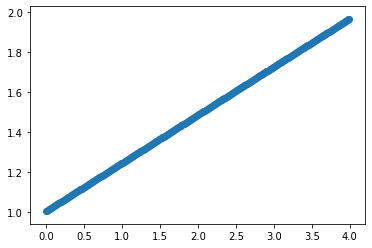

In [142]:
plt.scatter(a[0],a[1])
#plt.plot(a[2],a[0])

In [141]:
RMV

array([[1.00404433]])